# Decompositions of the circulation

## Introduction

In the previous chapter, we looked at time averaged quantities.

It's often going to be useful to consider this total flow as consisting of a *mean* and a *fluctuating* part.

## Time mean and zonal mean

We consider two means that are often used: *time* mean and *zonal* mean, along with deviations from these means.

We define the time mean as

$$ \overline{A} = \frac{1}{T} \int_0^T A dt $$

and the zonal mean as

$$ \left[ A \right] = \frac{1}{2\pi} \int_0^{2\pi} A d\lambda $$

where $t$ is time, $T$ is the total time interval over which we are averaging, $\lambda$ is longitude, and $A$ is whatever variable we are averaging.

This introduces a standardized notation, where the overbar will always indicate time averages and the square brackets will be reserved for zonal averages.

### Example

**Prove that the zonal and time mean mass flux across any latitude circle must vanish, for time scales greater than a year.**

Let's start with the continuity (mass) equation in pressure coordinates:

$$ \nabla \cdot \vec{u} = 0 $$

which we can write out in spherical coordinates like so:

$$ \frac{1}{a \cos\phi}\frac{\partial u }{\partial \lambda} + \frac{1}{a \cos\phi} \frac{\partial \left( v \cos\phi \right)}{\partial \phi}  + \frac{\partial \omega}{\partial p} $$

So if we take the time and zonal average of the continuity equation we get

$$ \left[ \frac{1}{a \cos\phi}\frac{\partial \overline{u} }{\partial \lambda} \right] + \left[ \frac{1}{a \cos\phi} \frac{\partial \left( \overline{v} \cos\phi \right)}{\partial \phi} \right] + \left[ \frac{\partial \overline{\omega}}{\partial p} \right] $$

which we can also write as

$$ \frac{1}{2 \pi a \cos\phi}\int_0^{2\pi} \frac{\partial \overline{u} }{\partial \lambda} d\lambda + \frac{1}{a \cos\phi} \frac{\partial }{\partial \phi} \left( \left[ \overline{v} \right] \cos\phi \right)  + \frac{\partial \left[ \overline{\omega} \right]}{\partial p}  $$

The first term is zero. **Why?**

Let's now integrate over the depth of the atmosphere, from surface pressure $p_s$ to zero:

$$  \frac{1}{a \cos\phi} \frac{\partial }{\partial \phi} \left( \cos\phi \int_0^{p_s} \left[\overline{v}\right]  dp \right) + \int_0^{p_s} \frac{\partial \left[\overline{\omega}\right]}{\partial p} dp $$

The second term is the integral of a derivative so resolves to only boundary contributions. At the TOA $\omega(0) = 0$, and so the term simplifies to just

$$\left[\overline{\omega}\right] |_{p_s}$$

We cannot have flow in or out of the surface. The boundary condition is complicated by the fact that the surface pressure is not constant in time, but over timescales of a year or more we do not expect any time-averaged changes in surface pressure. Therefore

$$\left[\overline{\omega}\right] |_{p_s} \approx 0$$

and the average mass budget reduces to

$$ \frac{\partial}{\partial \phi} \left( \cos\phi \int_0^{p_s} \left[\overline{v}\right]\right) = 0 $$

so 

$$  \cos\phi \int_0^{p_s} \left[\overline{v}\right] = C $$

for some constant $C$

The integral above is proportional to the next mass flux across latitude circles. So what is the constant $C$?

One way to rationalize this is to consider the polar limit where $\phi \rightarrow \frac{\pi}{2}$ and thus $\cos\phi \rightarrow 0$. This would then require that the integral becomes unboundedly large if $C\ne 0$.

We conclude that $C=0$ for all $\phi$, and thus **the zonal and time mean mass flxu across any latitude circle must vanish**.

## Departures from the mean

Let's introduce some more standardized notation for departures from our two means

### Departure from time mean

$$ A^\prime \equiv A - \overline{A} $$

### Departure from zonal mean

$$ A^* \equiv A - \left[ A \right] $$

### Some identities

Note that 

$$ \overline{A^\prime} = 0 $$

and

$$ \left[ A^\prime \right] = 0 $$

as long as the averaging is the same as that used to find the perturbations.

Also the averages permute:

\begin{align*}
\left[ \overline{A} \right] &= \overline{ \left[ A \right] } & \overline{ \overline{A} } &= \overline{A} & \left[ \left[A \right] \right]
\end{align*}

### Combining zonal and time expansions

We can decompose the full field into four terms:

$$ A = \overline{A} + A^\prime = \left[\overline{A}\right] + \overline{A}^* + \left[ A^\prime \right] + A^{\prime *} $$

where our four terms are

1. Zonally symmetric part of the steady time-averaged quantities, e.g. trade winds and midlatitude westerlies $\left[ \overline{u} \right]$
2. Asymmetric part of the time-averaged quantities, e.g. monsoon circulations, PNA, NAO (patterns which vary on only low frequencies)
3. Instantaneous fluctutations of symmetric part of quantities, e.g. time fluctuations in Hadley cells, mean jet locations
4. Instantaneous, zonally asymmetric part of quantities, e.g. transient cyclones and anticyclones

## Examples using some real data

We are going to load in some zonal wind data $u$ from the CFSR dataset.

For simplicity we'll just work with a few months of data here from a single year (only need to open one data file), and focus on a single pressure level (500 hPa, mid-troposphere).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
cfsr_path = '/cfsr/data/'
year = '2021'

ds = xr.open_dataset(cfsr_path + year + '/u.' + year + '.0p5.anl.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 1460, lat: 361, lon: 720, lev: 32)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    u        (time, lev, lat, lon) float32 ...
Attributes:
    description:    u 1000-10 hPa
    year:           2021
    source:         http://nomads.ncdc.noaa.gov/data.php?name=access#CFSR-data
    references:     Saha, et. al., (2010)
    created_by:     User: ab473731
    creation_date:  Sat Jan  2 06:00:32 UTC 2021

In [3]:
# instantaneous u on one day
u500 = ds.u.sel(lev=500.)
u500.sel(time='2021-01-01T00')

<xarray.DataArray 'u' (lat: 361, lon: 720)>
[259920 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2021-01-01
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
    lev      float32 500.0
Attributes:
    level_type:  isobaric_level (hPa)
    units:       m s^-1
    long_name:   zonal wind

Let's make a helper function to draw maps of lat-lon data:

In [4]:
def make_map(field):
    levs = np.linspace(-75,75,31)
    p = field.plot.contourf(levels=levs,
                            subplot_kws={'projection': ccrs.Robinson()},
                                    transform=ccrs.PlateCarree())
    p.axes.coastlines()
    return p

And make a map of the instantaneous $u$ on a particular day and time:

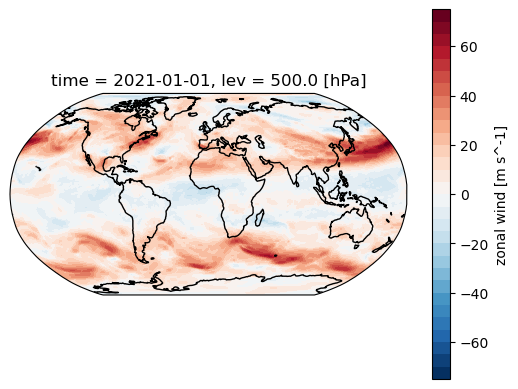

In [5]:
make_map(u500.sel(time='2021-01-01T00'));

To do some seasonal averaging, we need to pick a time interval. Let's choose all dates in January, February and March.

This is easy to do by slicing on the time axis:

In [6]:
# A time slice containing all of January, February and March
u500_JFM = u500.sel(time=slice('2021-01-01','2021-03-31'))
u500_JFM

<xarray.DataArray 'u' (time: 360, lat: 361, lon: 720)>
[93571200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-03-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
    lev      float32 500.0
Attributes:
    level_type:  isobaric_level (hPa)
    units:       m s^-1
    long_name:   zonal wind

This array has 360 points on the time axis, corresponding to 31+28+31 = 90 days @ 4 times daily.

Let's make a map of $\overline{u}$ by taking a time average:

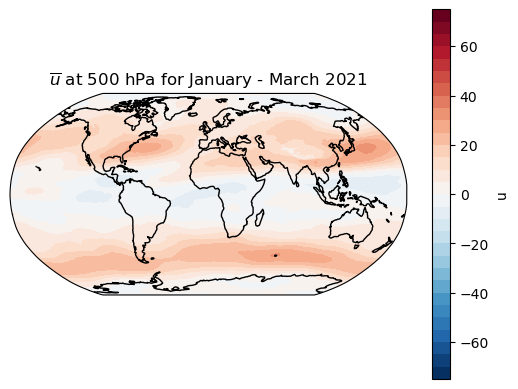

In [7]:
ubar = u500_JFM.mean(dim='time')
m = make_map(ubar)
plt.title('$\overline{u}$ at 500 hPa for January - March 2021');

If we further take the zonal average, we get $[\overline{u}]$

Since this quantity is one dimensional (latitude only), we'll make a line plot instead of a map:

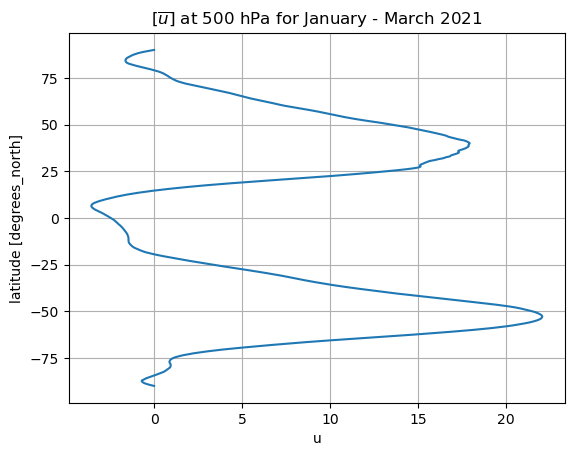

In [8]:
ubar.mean(dim=('lon')).plot(y='lat')
plt.title('$[\overline{u}]$ at 500 hPa for January - March 2021')
plt.grid();

Now here's $\overline{u^*}$, the time averaged departures from zonal mean:

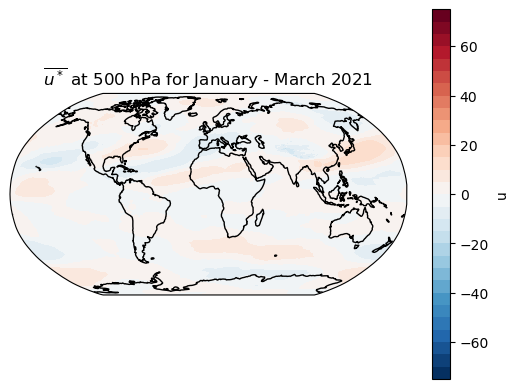

In [9]:
ustar = u500_JFM - u500_JFM.mean(dim='lon')
ustarbar = ustar.mean(dim='time')
m = make_map(ustarbar)
plt.title('$\overline{u^*}$ at 500 hPa for January - March 2021');

And here's $u^\prime$ (departures from time average) at one instant:

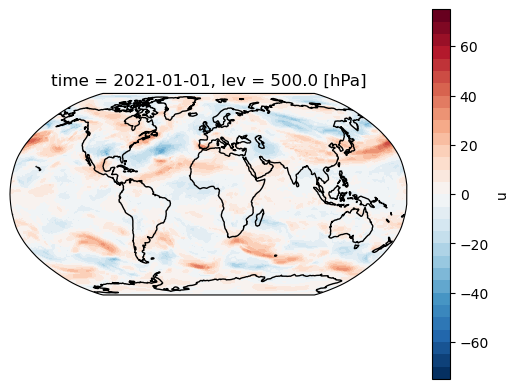

In [10]:
uprime = u500_JFM - ubar
make_map(uprime.sel(time='2021-01-01T00'));

and its zonal average $[u^\prime]$ as a line plot:

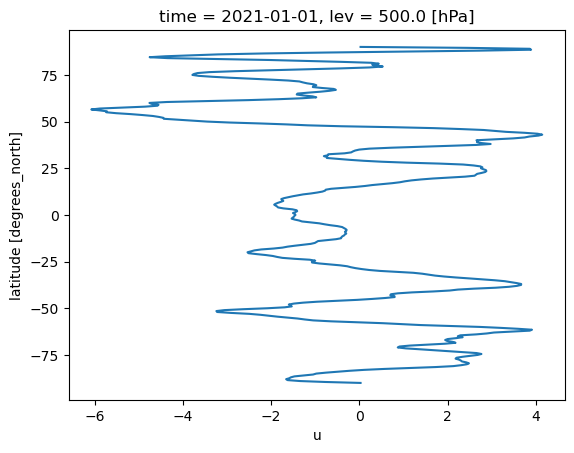

In [11]:
uprime.sel(time='2021-01-01T00').mean(dim='lon').plot(y='lat')

And finally the deviations away from that zonal average $u^{\prime*}$

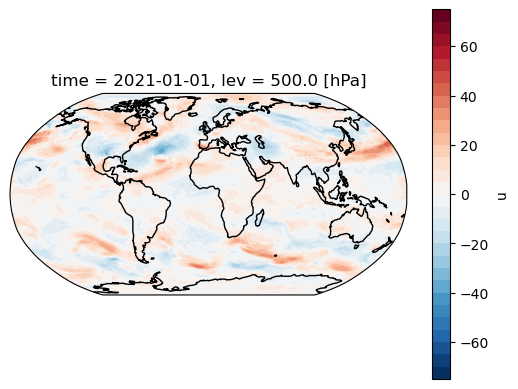

In [12]:
make_map((uprime - uprime.mean(dim='lon')).sel(time='2021-01-01T00'))

## Covariances between quantities

We are often interested in covariances between two quantities, usually a component of the flow and another scalar (e.g. meridional wind and temperature)

\begin{align*}
\overline{AB} &= \overline{\left( \overline{A} + A^\prime \right) \left(\overline{B} + B^\prime \right)} \\
&= \overline{\overline{A} \overline{B}} + \overline{\overline{A} B^\prime} + \overline{A^\prime \overline{B}} + \overline{A^\prime B^\prime} \\
&= \overline{A}\overline{B} + \overline{A} \overline{B^\prime} + \overline{B} \overline{A^\prime} + \overline{A^\prime B^\prime} \\
&= \overline{A}\overline{B} +  \overline{A^\prime B^\prime}
\end{align*}

The last term is the covariance of $A$ and $B$ in time.

Similarly for the zonal average

$$\left[ AB \right] = \left[A\right] \left[B\right] + \left[ A^* B^* \right] $$
where the last term is the covariance of $A$ and $B$ is longitude.

We can also combine the time and zonal means

\begin{align*}
\left[\overline{AB}\right] &= \left[ \overline{A}\overline{B} + \overline{A^\prime B^\prime} \right] \\
&= \left[\overline{A}\right]\left[\overline{B}\right] + \left[ \overline{A}^* \overline{B}^* \right] + \left[\overline{A^\prime B^\prime} \right]
\end{align*}

Three terms:
1. Mean meridional component
2. Stationary eddy component (zonal variations in time mean
3. Transient eddy component (time variations in time mean)

In [13]:
# plots of bar(vT), bar(v) bar(T), bar(vprime Tprime)

### Dependence on averaging period

The decomposition between transient and stationary fluxes depend on the chosen averaging period.

For very short time periods, $\left[\overline{A^\prime B^\prime}\right] \rightarrow 0$. The transient eddies disappear and all fluctuations appear as stationary eddies.

For timescales of ~3 months, the stationary eddies are seasonal features such as the Aleutian Low, and transient eddies are anything with residence times < 3 months (e.g. traveling synoptic systems)

At 12 month timescale, we have mostly transient eddies but still some stationary features due to orographic forcing.

## Examples: eddy heat flux

Let $A = v$ and $B = T$

and let's consider the quantity

$$ [\overline{vT}] = [\overline{v}][\overline{T}] + [\overline{v}^* \overline{T}^*] + [\overline{v^\prime T^\prime}] $$

In [14]:
# line plot of three-term decomposition

In [15]:
# Same thing in opposite season